# Ejercicio de retiro clasificatorio usando redes neuronales artificiales de manera manual

Se define la siguiente red neuronal, donde la primera capa son las 11 variables que se usarán para determinar si la persona es factible a realizar un retiro prematuro. Una primera capa oculta con 5 neuronas usando la función de activación ReLU. Una segunda capa oculta con 3 neuronas usando la función de activación Sigmoid y, por último, una capa de salida con 1 neurona usando la función de activación Sigmoid.

![Red Neuronal](./Red%20Neuronal.PNG)

Consideraremos las siguientes fórmulas para el forward propagation: <br>
Primera capa oculta:<br>
$z_{1} = XW_{xh1}+b_{h1}$<br>
$a_{1} = ReLU(z_{1})$<br>
Segunda capa oculta:<br>
$z_{2} = a_{1}W_{xh2}+b_{h2}$<br>
$a_{2} = Sigmoid(z_{2})$<br>
Capa de salida:<br>
$z_{3} = a_{2}W_{y}+b_{y}$<br>
$\hat{y} = Sigmoid(z_{3})$<br>
<br>
<br>
Consideraremos la siguiente función de pérdida:<br>
$L=-\frac{1}{n}\sum_{i=1}^{n}[y_{i}log(\hat{y})+(1-y_{i})log(1-\hat{y})]$<br>
Capa de salida:<br>
$\frac{\partial L}{\partial W_{y}}=\frac{\partial L}{\partial \hat{y}}\cdot\frac{\partial \hat{y}}{\partial z_{3}}\cdot\frac{\partial z_{3}}{\partial W_{y}}=(\hat{y}-y)\cdot a_{2}$<br>
$\frac{\partial L}{\partial B_{y}}=\frac{\partial L}{\partial \hat{y}}\cdot\frac{\partial \hat{y}}{\partial z_{3}}\cdot\frac{\partial z_{3}}{\partial B_{y}}=(\hat{y}-y)$<br>
Segunda capa oculta:<br>
$\frac{\partial L}{\partial W_{xh2}}=\frac{\partial L}{\partial \hat{y}}\cdot\frac{\partial \hat{y}}{\partial z_{3}}\cdot\frac{\partial z_{3}}{\partial a_{2}}\cdot\frac{\partial a_{2}}{\partial z_{2}}\cdot\frac{\partial z_{2}}{\partial W_{xh2}}=(\hat{y}-y)\cdot W_{y}\cdot Sigmoid'(z_{2})\cdot a_{1}$<br>
$\frac{\partial L}{\partial B_{h2}}=\frac{\partial L}{\partial \hat{y}}\cdot\frac{\partial \hat{y}}{\partial z_{3}}\cdot\frac{\partial z_{3}}{\partial a_{2}}\cdot\frac{\partial a_{2}}{\partial z_{2}}\cdot\frac{\partial z_{2}}{\partial B_{h2}}=(\hat{y}-y)\cdot W_{y}\cdot Sigmoid'(z_{2})$<br>
Primera capa oculta:<br>
$\frac{\partial L}{\partial W_{xh1}}=\frac{\partial L}{\partial \hat{y}}\cdot\frac{\partial \hat{y}}{\partial z_{3}}\cdot\frac{\partial z_{3}}{\partial a_{2}}\cdot\frac{\partial a_{2}}{\partial z_{2}}\cdot\frac{\partial z_{2}}{\partial a_{1}}\cdot\frac{\partial a_{1}}{\partial z_{1}}\cdot\frac{\partial z_{1}}{\partial W_{xh1}}=(\hat{y}-y)\cdot W_{y}\cdot Sigmoid'(z_{2})\cdot W_{xh2}\cdot ReLU'(z_{1})\cdot X$<br>
$\frac{\partial L}{\partial B_{h1}}=\frac{\partial L}{\partial \hat{y}}\cdot\frac{\partial \hat{y}}{\partial z_{3}}\cdot\frac{\partial z_{3}}{\partial a_{2}}\cdot\frac{\partial a_{2}}{\partial z_{2}}\cdot\frac{\partial z_{2}}{\partial a_{1}}\cdot\frac{\partial a_{1}}{\partial z_{1}}\cdot\frac{\partial z_{1}}{\partial B_{h1}}=(\hat{y}-y)\cdot W_{y}\cdot Sigmoid'(z_{2})\cdot W_{xh2}\cdot ReLU'(z_{1})$<br>


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#FUNCIONES DE ACTIVACIÓN
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(0, x)

def relu_prime(x):
    return np.where(x > 0, 1, 0)

In [5]:
#LECTURA DE DATOS
ERBD = pd.read_csv("C:/Users/clau_/OneDrive/Documentos/FCFM/03_Tetramestre/Aprendizaje_Profundo/Clase 03/EarlyRetirementPrediction.csv")
display(ERBD)

,Retire Before 65 Years Old,Gender,Desease,Education Level,Marital Status,Monthly Income,Employee/Employer,Dependants,Unemployment Rate,Stock Market,Credit Score,Government Bonds Return
0,1,1,1,3,0,18000,0,4,3.444876,24066.16667,699,7.715833
1,0,1,0,3,0,32000,0,1,5.023797,42063.16667,639,5.414833
2,0,1,1,4,0,20000,0,2,5.355220,30100.50000,610,7.962750
3,0,0,1,4,1,35000,1,1,3.843570,24066.16667,649,7.715833
4,0,0,1,3,0,27000,0,1,4.949226,19439.00000,638,8.024167
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1,0,0,5,1,26000,0,2,5.111358,32304.66667,604,7.193917
1496,0,1,0,3,0,32000,0,4,4.929185,41229.83333,753,5.910000
1497,1,1,1,4,1,17000,0,2,5.054852,37846.16667,631,6.198750
1498,0,0,0,5,0,26000,0,2,4.827790,41229.83333,613,5.910000


In [7]:
#DEFINIR CONJUNTO DE ENTRENAMIENTO Y CONJUNTO DE PRUEBA
train, test = train_test_split(ERBD, test_size=0.2)

train_x = train[["Gender", "Desease", "Education Level", "Marital Status", "Monthly Income", "Employee/Employer", "Dependants",
           "Unemployment Rate", "Stock Market", "Credit Score", "Government Bonds Return"]]
train_y = train[["Retire Before 65 Years Old"]]
test_x = test[["Gender", "Desease", "Education Level", "Marital Status", "Monthly Income", "Employee/Employer", "Dependants",
           "Unemployment Rate","Stock Market","Credit Score","Government Bonds Return"]]
test_y = test[["Retire Before 65 Years Old"]]

In [8]:
#EL MÓDULO DE ESTANDARIZAR SE GUARDA EN UN OBJETO
Standarize = StandardScaler()

train_xs = Standarize.fit_transform(train_x)
test_xs = Standarize.fit_transform(test_x)

In [69]:
#DEFINIMOS LAS VARIABLES PARA EL CICLO
batch_size = 10
epochs = 150
num_batches = len(train_xs) // batch_size
Wxh1 = np.random.randn(11, 5)
bh1 = np.zeros((1, 5))
Wxh2 = np.random.randn(5, 3)
bh2 = np.zeros((1, 3))
Wy = np.random.randn(3, 1)
by = np.zeros((1, 1))

In [70]:
#CICLO DE ENTRENAMIENTO
for epoch in range(epochs):
    correct_predictions = 0
    for batch in range(num_batches):
        #Seleccionamos el batch actual
        start_idx = batch * batch_size
        end_idx = (batch + 1) * batch_size
        X_batch = train_xs[start_idx:end_idx]
        Y_batch = train_y[start_idx:end_idx]

        #Forward propagation
        Z1 = np.dot(X_batch, Wxh1) + bh1
        A1 = relu(Z1)
        
        Z2 = np.dot(A1, Wxh2) + bh2
        A2 = sigmoid(Z2)

        Z3 = np.dot(A2, Wy) + by
        y_gorro = sigmoid(Z3)

        #Función de pérdida
        loss = -np.mean(Y_batch * np.log(y_gorro) + (1 - Y_batch) * np.log(1 - y_gorro))

        # Backward Propagation
        dZ3 = y_gorro - Y_batch
        dWy = np.dot(A2.T, dZ3)
        dBy = np.sum(dZ3, axis=0)

        dZ2 = np.dot(dZ3, Wy.T) * sigmoid_prime(Z2)
        dWxh2 = np.dot(A1.T, dZ2)
        dbh2 = np.sum(dZ2, axis=0)

        dZ1 = np.dot(dZ2, Wxh2.T) * relu_prime(Z1)
        dWxh1 = np.dot(X_batch.T, dZ1)
        dbh1 = np.sum(dZ1, axis=0)

        # Actualización de Parámetros (Descenso de Gradiente)
        learning_rate = 0.01
        Wxh1 -= learning_rate * dWxh1
        bh1 -= learning_rate * dbh1
        Wxh2 -= learning_rate * dWxh2
        bh2 -= learning_rate * dbh2
        Wy -= learning_rate * dWy
        by -= learning_rate * dBy.ravel()

        predictions = (y_gorro > 0.5).astype(int)

        array_unidimensional = Y_batch['Retire Before 65 Years Old'].values
        array_bidimensional = array_unidimensional[:, np.newaxis]

        # Predicciones y cálculo de precisión
        correct_predictions += np.sum(predictions == array_bidimensional)

    accuracy = correct_predictions / len(train_xs)
    # Imprime la pérdida después de cada época (opcional)
    print(f'Epoch {epoch + 1}, Loss: {loss}, Accuracy: {accuracy}')

Epoch 1, Loss: 0.6673741383012493, Accuracy: 0.485
Epoch 2, Loss: 0.6500554192034081, Accuracy: 0.5366666666666666
Epoch 3, Loss: 0.6104088767542637, Accuracy: 0.6041666666666666
Epoch 4, Loss: 0.5789292058911766, Accuracy: 0.6475
Epoch 5, Loss: 0.5816960810568587, Accuracy: 0.6866666666666666
Epoch 6, Loss: 0.611935616438738, Accuracy: 0.7158333333333333
Epoch 7, Loss: 0.6451437515342162, Accuracy: 0.7358333333333333
Epoch 8, Loss: 0.6757213589734297, Accuracy: 0.7541666666666667
Epoch 9, Loss: 0.7055182727409886, Accuracy: 0.7625
Epoch 10, Loss: 0.7338720605777233, Accuracy: 0.7725
Epoch 11, Loss: 0.7551412866520264, Accuracy: 0.7758333333333334
Epoch 12, Loss: 0.7665753349689882, Accuracy: 0.7766666666666666
Epoch 13, Loss: 0.7765295523289868, Accuracy: 0.7866666666666666
Epoch 14, Loss: 0.7787318915951237, Accuracy: 0.7858333333333334
Epoch 15, Loss: 0.8147038508311267, Accuracy: 0.7916666666666666
Epoch 16, Loss: 0.8559869691714006, Accuracy: 0.7991666666666667
Epoch 17, Loss: 0.8

In [74]:
#Imprimimos las Ws y Bs
print(f'Wxh1 \n {Wxh1}, \n Bh1: \n {bh1}, \n Wxh2: \n {Wxh2}, \n Bh2: \n {bh2}, \n Wy: \n {Wy} \n By: \n {by}')

Wxh1 
 [[-0.59420411  1.89027229  0.55512752  1.70619672  0.22774855]
 [ 1.11558831  1.2511401   1.3020779  -1.02060719 -0.57243955]
 [-0.24427028 -3.05482725 -0.50002094 -0.44936098  0.69424555]
 [-0.03283871  0.53730491 -0.48576555  0.19489075 -0.64833051]
 [ 1.64450492  0.2273207  -0.73667105 -0.14186601 -2.36106042]
 [-1.2872879   0.8696696   0.32647348 -0.91245187  0.36697104]
 [-5.83925078  1.97039033 -1.91630659  1.69744443  1.5330821 ]
 [ 0.14222205  0.83035173  1.77161039  0.10580213  0.13090355]
 [ 1.29842785  0.57259872 -1.61536514  2.14340731 -0.90836581]
 [ 0.09744098 -0.67875788  1.37558142  1.86204292 -0.52224962]
 [ 0.73633802 -0.34024699  1.69360319  0.90512387  1.34287474]], 
 Bh1: 
 [[ 1.32899073 -0.24265208  0.64728279  0.01739195 -0.56171857]], 
 Wxh2: 
 [[-2.32694253  2.83292967  2.05507595]
 [ 1.13944979 -1.61617173  1.66925203]
 [ 1.01942726  1.91040427 -0.77863687]
 [-1.15369881 -2.68497171 -0.93174135]
 [-0.39679635 -1.31847705 -1.12609337]], 
 Bh2: 
 [[-0.183

In [75]:
#Aplicamos lo calculado al de test
Z1 = np.dot(test_xs, Wxh1) + bh1
A1 = relu(Z1)

Z2 = np.dot(A1, Wxh2) + bh2
A2 = sigmoid(Z2)

Z3 = np.dot(A2, Wy) + by
y_gorro = sigmoid(Z3)

In [76]:
#GUARDAR LAS PREDICCIONES EN UNA DATA FRAME
PredictionsDF = pd.DataFrame(y_gorro)
PredictionsDF.columns = ["Probabilities"]
PredictionsDF.head(20)

,Probabilities
0,0.836818
1,0.088036
2,0.876013
3,0.786973
4,0.088029
5,0.088340
6,0.874614
7,0.867607
8,0.873894
9,0.881329


In [91]:
#DEFINIR EL UMBRAL ÓPTIMO
PredictionsDF["Umbral"] = 0
PredictionsDF.loc[PredictionsDF["Probabilities"] > 0.3, "Umbral"] = 1
PredictionsDF.head(20)

,Probabilities,Umbral
0,0.836818,1
1,0.088036,0
2,0.876013,1
3,0.786973,1
4,0.088029,0
5,0.088340,0
6,0.874614,1
7,0.867607,1
8,0.873894,1
9,0.881329,1


In [92]:
test_y = pd.DataFrame(test_y)
test_y.columns = ["Retire Before 65 Years Old"]
test_y.head()

,Retire Before 65 Years Old
0,1
1,1
2,1
3,0
4,0


In [93]:
PredictionsDF.reset_index(drop = True, inplace = True)
test_y.reset_index(drop = True, inplace = True)
print(test_y)

     Retire Before 65 Years Old
0                             1
1                             1
2                             1
3                             0
4                             0
..                          ...
295                           1
296                           0
297                           0
298                           0
299                           0

[300 rows x 1 columns]


In [94]:
Results = pd.concat([PredictionsDF, test_y], axis = 1)
Results = pd.DataFrame(Results)
Results.head()

,Probabilities,Umbral,Retire Before 65 Years Old
0,0.836818,1,1
1,0.088036,0,1
2,0.876013,1,1
3,0.786973,1,0
4,0.088029,0,0


In [95]:
Results["PositivePositive"] = 0
Results["Sum1"] = Results["Umbral"] + Results["Retire Before 65 Years Old"]
Results.loc[Results["Sum1"] == 2, "PositivePositive"] = 1
Results.head()

,Probabilities,Umbral,Retire Before 65 Years Old,PositivePositive,Sum1
0,0.836818,1,1,1,2
1,0.088036,0,1,0,1
2,0.876013,1,1,1,2
3,0.786973,1,0,0,1
4,0.088029,0,0,0,0


In [96]:
#TASA DE VERDADEROS POSITIVOS
TPR=Results["PositivePositive"].sum()/Results["Retire Before 65 Years Old"].sum()
TPR

0.8561151079136691

In [97]:
Results["NegativeNegative"] = 0
Results.loc[Results["Sum1"] == 0, "NegativeNegative"] = 1
Results.head()

,Probabilities,Umbral,Retire Before 65 Years Old,PositivePositive,Sum1,NegativeNegative
0,0.836818,1,1,1,2,0
1,0.088036,0,1,0,1,0
2,0.876013,1,1,1,2,0
3,0.786973,1,0,0,1,0
4,0.088029,0,0,0,0,1


In [98]:
#TASA DE VERDADEROS NEGATIVOS
TNR=Results["NegativeNegative"].sum()/(300-Results["Retire Before 65 Years Old"].sum())
TNR

0.7701863354037267

In [99]:
#PRECISION BALANCEADA
BA=(TPR+TNR)/2
BA

0.813150721658698

In [100]:
from sklearn.metrics import roc_curve, auc

In [101]:
fpr, tpr, thresholds = roc_curve(test_y["Retire Before 65 Years Old"], Results["Probabilities"])
roc_auc = auc(fpr, tpr)

In [102]:
# Encuentra el umbral óptimo
optimal_threshold = thresholds[np.argmax(tpr - fpr)]

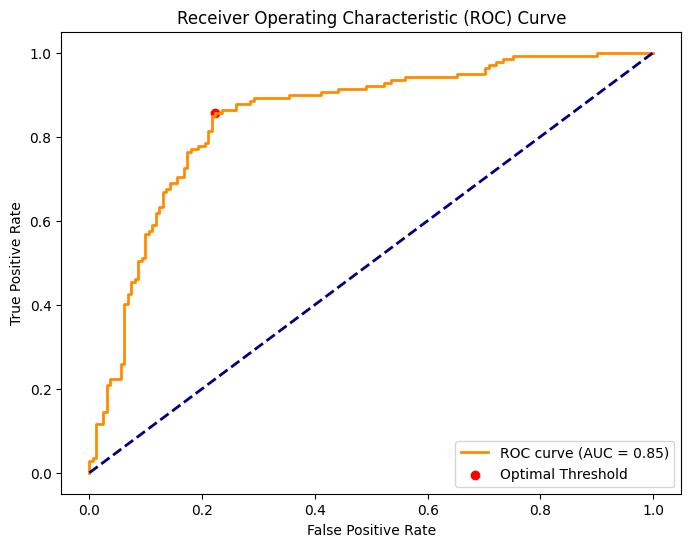

Umbral óptimo: 0.31887495841683805


In [103]:
# Grafica la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr[np.argmax(tpr - fpr)], tpr[np.argmax(tpr - fpr)], marker='o', color='red', label='Optimal Threshold')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Umbral óptimo:", optimal_threshold)

In [104]:
conf_matrix = confusion_matrix(test_y["Retire Before 65 Years Old"], Results["Umbral"])

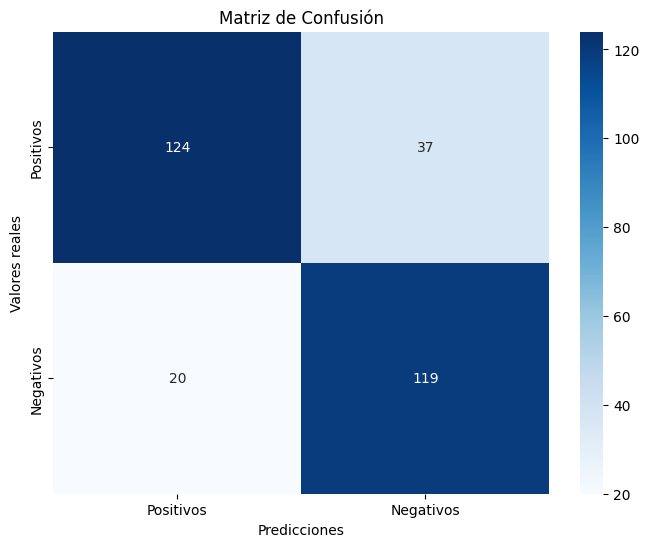

In [105]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Positivos', 'Negativos'],
            yticklabels=['Positivos', 'Negativos'])
plt.xlabel('Predicciones')
plt.ylabel('Valores reales')
plt.title('Matriz de Confusión')
plt.show()